# Ejemplo Para Examen

## k-means

En kmeans, crearemos un modelo que a partir de las propiedades de sus características logre agrupar nuestras filas, individuos o muestras. En este caso, para validar que nuestros resultados esten bien, cargaremos un dataset en el que ya sabemos a que categoria pertenece cada individuo, es decir datos con etiqueta o etiquetados (labeled).
   
   
En el caso de k-means, primero debemos conocer el problema, es decir, que queremos clusterizar y a partir de que.
En este caso, voy a realizar el clustering de un grupo de flores llamados Iris, son tres especies distintas _Iris setosa_, _Iris virginica_ e _Iris versicolor_. 
  
  
Se midieron cuatro atributos de cada flor.
Largo y ancho del sépalo, largo y ancho del pétalo.
    
Es decir para cada muestra tenemos cuatro variables. El total de muestras son 50 de cada especie, o sea, 150 muestras totales. (33.3% de cada especie)



Cargaremos los paquetes de python comunes

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Sacaremos el conjunto de datos desde `sklearn`. 

In [121]:
from sklearn import datasets



Importaremos el algoritmo de agrupamiento/clustering `KMeans` desde `sklearn.cluster`

In [36]:
from sklearn.cluster import KMeans

Asignamos el conjunto de datos a una variable

In [37]:
iris= datasets.load_iris()

### Veamos lo que tenemos en el IRIS dataset

In [38]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Podemos apreciar que tenemos variados datos, por ejemplo un arreglo llamado `data`, otro llamado `target`, y un `target_names` con los nombres de cada target entre otros.

In [39]:
iris.data.shape

(150, 4)

150 muestras (50 de cada una, ó 33.3333% de cada especie en el dataset). 4 variables que son...

In [40]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

 4 variables que en orden corresponden a Largo del sépalo, ancho del sépalo, largo del pétalo y ancho del pétalo.

In [41]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
iris.target_names.tolist()

['setosa', 'versicolor', 'virginica']

Podriamos graficar algunos de los campos de nuestro dataset, hagamos un scatterplot del largo del sépalo y el ancho del sépalo.

Text(0.5, 1.0, 'Dataset Iris - Largo del Sépalo vs Ancho del Sépalo')

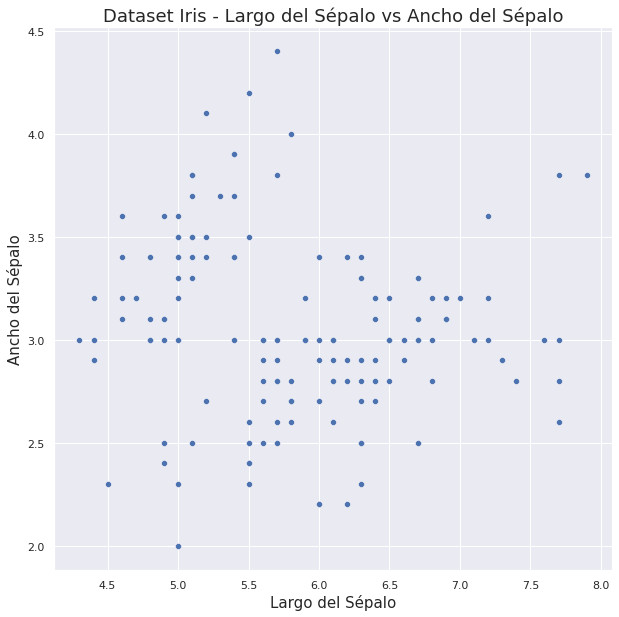

In [125]:

fig = plt.figure(figsize=(10,10))
data=iris.data
target=iris.target
nombres=iris.target_names.tolist()
ax= sns.scatterplot(x=data[:,0], y=data[:,1])
ax.set_xlabel('Largo del Sépalo', fontsize=15)
ax.set_ylabel('Ancho del Sépalo', fontsize=15)
ax.set_title("Dataset Iris - Largo del Sépalo vs Ancho del Sépalo", fontsize=18)

Así es como veriamos los datos de forma natural, pero nosotros ya conocemos las etiquetas, vamos a mirar como se ven los datos si agregamos las etiquetas

Text(0.5, 1.0, 'Dataset Iris - Largo del Sépalo vs Ancho del Sépalo')

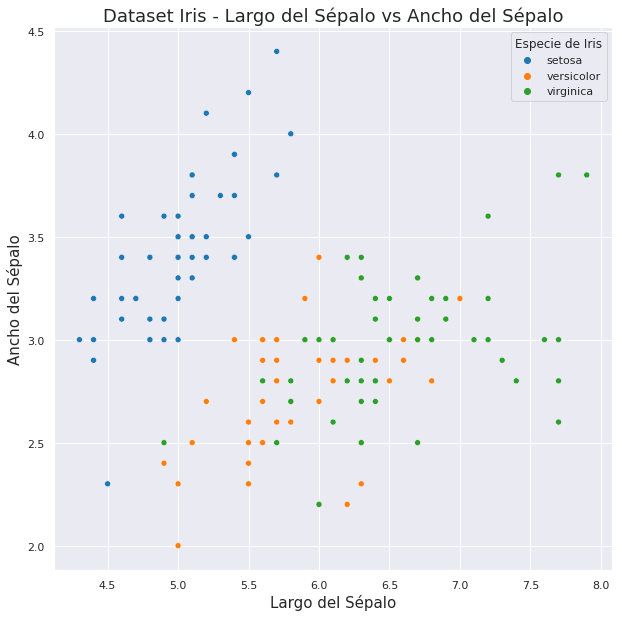

In [127]:

fig = plt.figure(figsize=(10,10))
colores='tab10'
ax= sns.scatterplot(x=data[:,0], y=data[:,1], hue=target, palette=colores)
ax.legend(ax.legend_.legendHandles, nombres, title='Especie de Iris')
ax.set_xlabel('Largo del Sépalo', fontsize=15)
ax.set_ylabel('Ancho del Sépalo', fontsize=15)
ax.set_title("Dataset Iris - Largo del Sépalo vs Ancho del Sépalo", fontsize=18)


Text(0.5, 1.0, 'Dataset Iris - Largo del Pétalo vs Ancho del Pétalo')

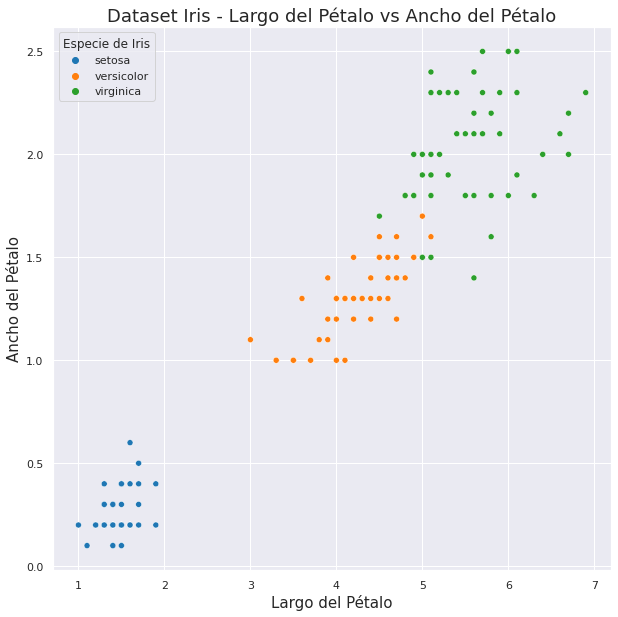

In [106]:

fig = plt.figure(figsize=(10,10))
ax= sns.scatterplot(x=data[:,2], y=data[:,3], hue=target, palette=colores)
ax.legend(ax.legend_.legendHandles, nombres, title='Especie de Iris')
ax.set_xlabel('Largo del Pétalo', fontsize=15)
ax.set_ylabel('Ancho del Pétalo', fontsize=15)
ax.set_title("Dataset Iris - Largo del Pétalo vs Ancho del Pétalo", fontsize=18)


Grafiquemos las otras variables:

In [107]:
df = pd.DataFrame(iris.data, columns=["Largo_Sépalo","Ancho_Sépalo","Largo_Pétalo","Ancho_Pétalo"])

In [108]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Largo_Sépalo', ylabel='Largo_Sépalo'>,
        <AxesSubplot:xlabel='Ancho_Sépalo', ylabel='Largo_Sépalo'>,
        <AxesSubplot:xlabel='Largo_Pétalo', ylabel='Largo_Sépalo'>,
        <AxesSubplot:xlabel='Ancho_Pétalo', ylabel='Largo_Sépalo'>],
       [<AxesSubplot:xlabel='Largo_Sépalo', ylabel='Ancho_Sépalo'>,
        <AxesSubplot:xlabel='Ancho_Sépalo', ylabel='Ancho_Sépalo'>,
        <AxesSubplot:xlabel='Largo_Pétalo', ylabel='Ancho_Sépalo'>,
        <AxesSubplot:xlabel='Ancho_Pétalo', ylabel='Ancho_Sépalo'>],
       [<AxesSubplot:xlabel='Largo_Sépalo', ylabel='Largo_Pétalo'>,
        <AxesSubplot:xlabel='Ancho_Sépalo', ylabel='Largo_Pétalo'>,
        <AxesSubplot:xlabel='Largo_Pétalo', ylabel='Largo_Pétalo'>,
        <AxesSubplot:xlabel='Ancho_Pétalo', ylabel='Largo_Pétalo'>],
       [<AxesSubplot:xlabel='Largo_Sépalo', ylabel='Ancho_Pétalo'>,
        <AxesSubplot:xlabel='Ancho_Sépalo', ylabel='Ancho_Pétalo'>,
        <AxesSubplot:xlabel='Largo_Pétalo', y

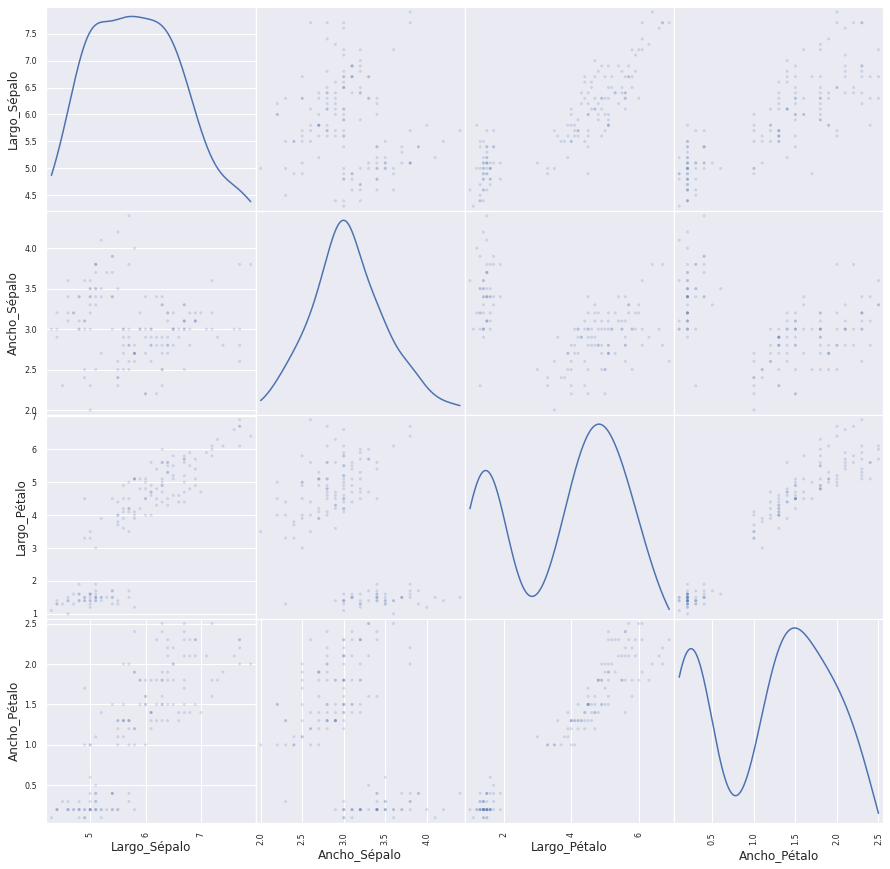

In [111]:
scatter_matrix(df, alpha= 0.2, figsize=(15,15), diagonal="kde")

Fácilmente podemos apreciar al menos dos clúster en nuestros datos cuando vemos el KDE de largo pétalo. Comenzaremos por hacer un kmeans con un k=2 (k es el número de clusters), inicializaremos en 5, de esta manera podemos volver a repetir el ejercicio, obteniendo el mismo resultado. 

In [115]:
km= KMeans(n_clusters=2, random_state=5)

### Ejecutamos el modelo sobre nuestros datos:

In [116]:
km.fit(df)

KMeans(n_clusters=2, random_state=5)

In [117]:
centros= km.cluster_centers_
centros

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

Ahora veremos como anda el modelo contra nuestros datos originales, en nuestro caso, ya conocemos a que corresponde cada fila, por lo que probaremos que los datos estén bien.

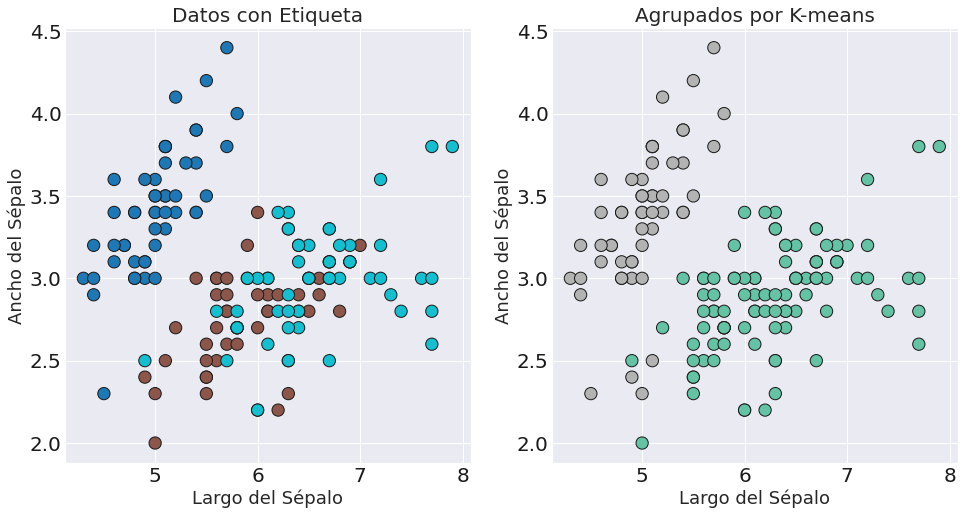

In [156]:

nuevos_target = km.labels_
#Graficaremos los originales y nuestra predicción
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(data[:, 0], data[:, 1], c=target, cmap=sns.color_palette('tab10',as_cmap=True), edgecolor='k', s=150)
axes[1].scatter(data[:, 0], data[:, 1], c=nuevos_target, cmap=sns.color_palette('Set2',as_cmap=True),
edgecolor='k', s=150)
axes[0].set_xlabel('Largo del Sépalo', fontsize=18)
axes[0].set_ylabel('Ancho del Sépalo', fontsize=18)
axes[0].set_title('Datos con Etiqueta', fontsize=20)
axes[1].set_xlabel('Largo del Sépalo', fontsize=18)
axes[1].set_ylabel('Ancho del Sépalo', fontsize=18)
axes[1].set_title('Agrupados por K-means', fontsize=20)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)



# Entonces nace la pregunta, ¿Cómo podemos elegir un número bueno de grupos?



### R: Para esto está el método del codo

##### Ahora ejecutaremos el clustering, pero iremos variando el número de clusters y después realizaremos un gráfico

Haremos los cálculos desde 1 a 20

In [157]:
inercia=[]
K = range(1,20)

In [160]:
for k in K:
    kmodel=KMeans(n_clusters=k,random_state=5)
    kmodel.fit(data)
    inercia.append(kmodel.inertia_)
    

In [161]:
inercia

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.53097186147184,
 30.064593073593088,
 28.203305703584352,
 26.25192575064144,
 24.597605263157888,
 22.77674392420446,
 21.772062540400785,
 20.60845804737059,
 19.392476689214668,
 17.702568740692328,
 16.64868471234648,
 16.19268897768898,
 15.088933802308809]

Text(0.5, 1.0, 'Inercia versus número de grupos')

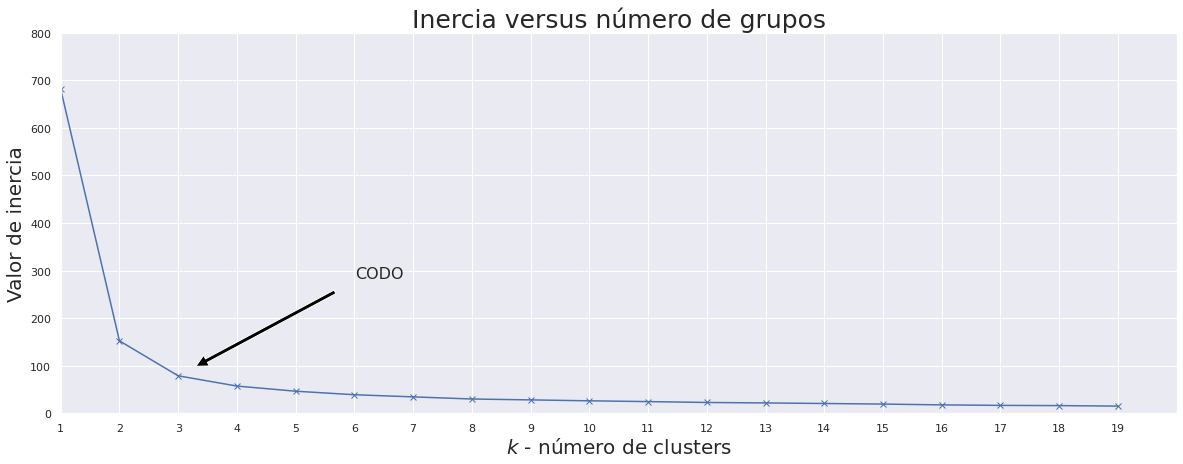

In [201]:
fig=plt.figure(figsize=(20,7))
plt.plot(K,inercia,'bx-')
plt.xticks(K)
plt.annotate('CODO',
             xy=(3, inercia[2]),
             xytext=(0.3, 0.4),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.xlabel('$k$ - número de clusters', fontsize=20)
plt.ylabel('Valor de inercia',fontsize=20)
plt.axis([1,20,0,800])
plt.title("Inercia versus número de grupos", fontsize=25)

### Otro modo de estimar el número de cluster es el coeficiente de silueta

In [204]:
from sklearn.metrics import silhouette_score as silueta

In [205]:
silueta(data,kmodel.labels_)

0.29847421235227634

Repetimos lo mismo de arriba pero con silueta

In [215]:
silueta_arreglo=[]
K=range(2,20)
for k in K:
    kmodel=KMeans(n_clusters=k,random_state=5)
    kmodel.fit(data)
    silueta_arreglo.append(silueta(data,kmodel.labels_))
    

Text(0.5, 1.0, 'Silueta versus número de grupos')

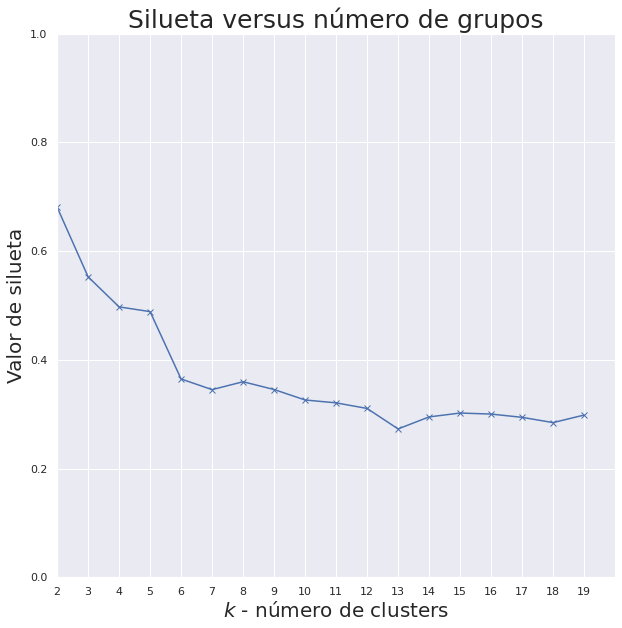

In [220]:
fig=plt.figure(figsize=(10,10))
plt.plot(K,silueta_arreglo,'bx-')
plt.xticks(K)
#plt.annotate('CODO',
#             xy=(3, inercia[2]),
#             xytext=(0.3, 0.4),
#             textcoords='figure fraction',
#             fontsize=16,
#             arrowprops=dict(facecolor='black', shrink=0.1)
#            )
plt.xlabel('$k$ - número de clusters', fontsize=20)
plt.ylabel('Valor de silueta',fontsize=20)
plt.axis([2,20,0,1])
plt.title("Silueta versus número de grupos", fontsize=25)